In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats


# Metoda najmniejszych kwadratów

Nachylenie (a): 0.5999999999999999
Wyraz wolny (b): 2.200000000000003


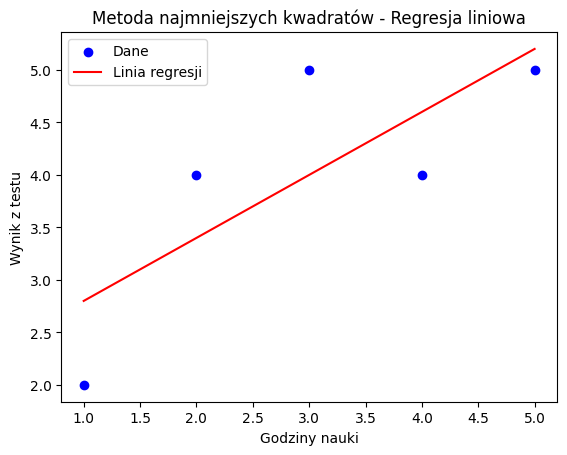

In [19]:
# Dane wejściowe: godziny nauki (x) i wyniki testu (y)
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 5, 4, 5])

# Tworzenie macierzy projektującej X (dodajemy kolumnę jedynek)
X = np.vstack((x, np.ones(len(x)))).T

# Obliczanie współczynników metodą najmniejszych kwadratów
# beta = (X^T X)^(-1) X^T y
beta = np.linalg.inv(X.T @ X) @ X.T @ y

# Wyodrębnienie parametrów a (nachylenie) i b (wyraz wolny)
a, b = beta

print(f"Nachylenie (a): {a}")
print(f"Wyraz wolny (b): {b}")

# Rysowanie wykresu danych i dopasowanej linii regresji
plt.scatter(x, y, color='blue', label='Dane')
plt.plot(x, a * x + b, color='red', label='Linia regresji')
plt.xlabel('Godziny nauki')
plt.ylabel('Wynik z testu')
plt.legend()
plt.title('Metoda najmniejszych kwadratów - Regresja liniowa')
plt.show()

In [20]:
# Obliczanie reszt (błędów) modelu
residuals = y - (a * x + b)

# Obliczanie wariancji reszt
residual_variance = np.var(residuals, ddof=2)

# Obliczanie macierzy kowariancji parametrów
XTX_inv = np.linalg.inv(X.T @ X)
param_covariance_matrix = residual_variance * XTX_inv

# Błędy standardowe parametrów a i b
param_errors = np.sqrt(np.diag(param_covariance_matrix))

error_a, error_b = param_errors

error_a, error_b

(np.float64(0.28284271247461895), np.float64(0.9380831519646857))

In [21]:
# Obliczanie współczynnika korelacji Pearsona z macierzy projektującej X i wektora y
# Współczynnik korelacji Pearsona: r = cov(X, y) / (std(X) * std(y))

# Obliczanie średnich
mean_x = np.mean(x)
mean_y = np.mean(y)

# Obliczanie kowariancji
cov_xy = np.sum((x - mean_x) * (y - mean_y)) / (len(x) - 1)

# Obliczanie odchyleń standardowych
std_x = np.std(x, ddof=1)
std_y = np.std(y, ddof=1)

# Obliczanie współczynnika korelacji Pearsona
pearson_coefficient = cov_xy / (std_x * std_y)

pearson_coefficient

np.float64(0.7745966692414834)

# Zadanie 1

Wykorzystując `np.random.normal`, wygeneruj dane testowe (1000 punktów na płaszczyźnie w zależnosci liniowej między x i y) , do których zastosuj metodę najmniejszych kwadratów (możesz użyć **stats.linregres, scipy.optimize.curve_fit, numpy.polyfit**).
- Znajdź parametry prostej $y = a \cdot x + b$ .


Parametry dopasowanej prostej:
a (slope) = 2.5180
b (intercept) = -3.9420
Współczynnik korelacji R = 0.9803


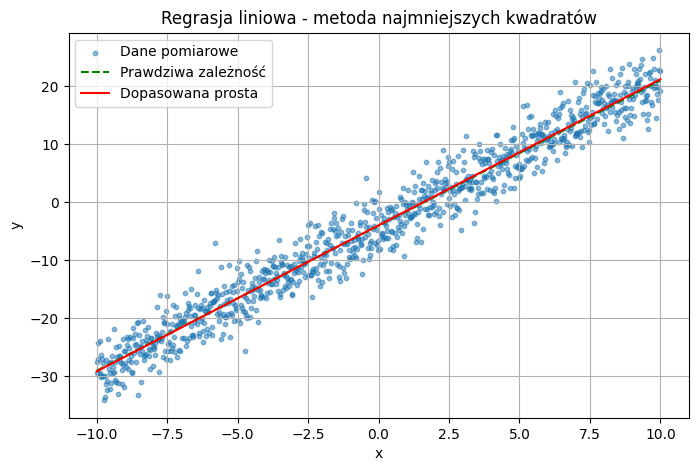

In [22]:
np.random.seed(42)
x = np.linspace(-10, 10, 1000)

a_true = 2.5
b_true = -4.0

noise = np.random.normal(0, 3, size=len(x))
y = a_true * x + b_true + noise

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

print(f"Parametry dopasowanej prostej:")
print(f"a (slope) = {slope:.4f}")
print(f"b (intercept) = {intercept:.4f}")
print(f"Współczynnik korelacji R = {r_value:.4f}")

plt.figure(figsize=(8,5))
plt.scatter(x, y, s=10, alpha=0.5, label='Dane pomiarowe')
plt.plot(x, a_true * x + b_true, 'g--', label='Prawdziwa zależność')
plt.plot(x, slope * x + intercept, 'r', label='Dopasowana prosta')
plt.title("Regrasja liniowa - metoda najmniejszych kwadratów")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()


# Zadanie 2

Wczytaj dane z pliku **LungDisease.csv** do DataFrame za pomocą biblioteki `pandas`. Dane te zawierają informacje o liczbie lat, przez które pracownik był narażony na pył bawełniany (**Exposure**), oraz o miarze pojemności płuc (**PEFR** - szczytowy przepływ wydechowy).

- Następnie, używając biblioteki matplotlib lub seaborn, stwórz wykres punktowy, na którym na osi x znajdzie się zmienna **Exposure**, a na osi y zmienna **PEFR**.

- Po stworzeniu wykresu, oblicz współczynnik korelacji Pearsona między **Exposure** a **PEFR**, aby ilościowo określić siłę i kierunek zależności między tymi zmiennymi.

- Na koniec, dopasuj prostą regresji liniowej do danych, aby zobaczyć, jak **PEFR** zmienia się w zależności od **Exposure**. Wyświetl wykres z dopasowaną prostą regresji

- Zastanów się, czy na wykresie punktowym widać wyraźny trend lub wzorzec. Czy PEFR rośnie czy maleje wraz z Exposure? Czy są jakieś odstające punkty lub nietypowe dane?

Podgląd danych:
   PEFR  Exposure
0   390         0
1   410         0
2   430         0
3   460         0
4   420         1


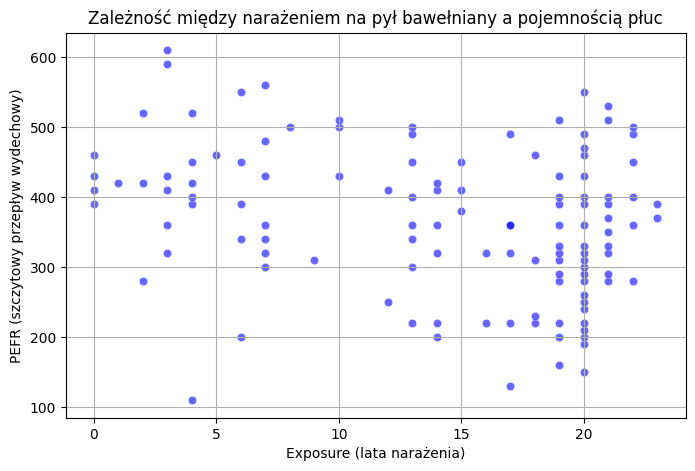


Współczynnik korelacji Pearsona: -0.2770
Wartość p: 2.0084e-03


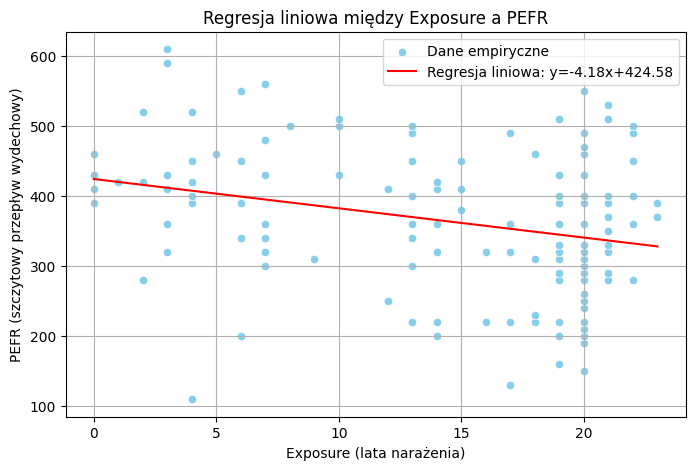

- PEFR maleje wraz ze wzrostem Exposure.
- Współczynnik korelacji (-0.28) wskazuje na słabą zależność.


In [29]:
df = pd.read_csv('LungDisease.csv')
print("Podgląd danych:")
print(df.head())

plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Exposure', y='PEFR', color='blue', alpha=0.6)
plt.title("Zależność między narażeniem na pył bawełniany a pojemnością płuc")
plt.xlabel("Exposure (lata narażenia)")
plt.ylabel("PEFR (szczytowy przepływ wydechowy)")
plt.grid(True)
plt.show()

corr, p_value = stats.pearsonr(df['Exposure'], df['PEFR'])
print(f"\nWspółczynnik korelacji Pearsona: {corr:.4f}")
print(f"Wartość p: {p_value:.4e}")

slope, intercept, r_value, p_value, std_err = stats.linregress(df['Exposure'], df['PEFR'])

plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Exposure', y='PEFR', color='skyblue', label='Dane empiryczne')
plt.plot(df['Exposure'], slope*df['Exposure'] + intercept, 'r', label=f'Regresja liniowa: y={slope:.2f}x+{intercept:.2f}')
plt.title("Regresja liniowa między Exposure a PEFR")
plt.xlabel("Exposure (lata narażenia)")
plt.ylabel("PEFR (szczytowy przepływ wydechowy)")
plt.legend()
plt.grid(True)
plt.show()

if slope < 0:
    trend = "maleje"
else:
    trend = "rośnie"

print(f"- PEFR {trend} wraz ze wzrostem Exposure.")
print(f"- Współczynnik korelacji ({corr:.2f}) wskazuje na {'silną' if abs(corr)>0.7 else 'umiarkowaną' if abs(corr)>0.4 else 'słabą'} zależność.")


# Zadanie 3

1. **Wczytaj dane:**
   - Wczytaj dane z pliku `anscombe.csv` do DataFrame za pomocą biblioteki `pandas`.
   - Przekształć dane, aby miały format:

     ```
         x1    y1    x2    y2    x3     y3   x4    y4
     0  10.0  8.04  10.0  9.14  10.0   7.46  8.0  6.58
     1   8.0  6.95   8.0  8.14   8.0   6.77  8.0  5.76
     ```

2. **Stwórz wykresy punktowe:**
   - Użyj biblioteki `matplotlib` lub `seaborn`, aby stworzyć wykresy.
   - Na każdej osi (`ax`) umieść wykres punktowy dla par `x1, y1`, `x2, y2`, `x3, y3` oraz `x4, y4`.

3. **Dopasuj funkcje liniowe:**
   - Dla każdej pary `x1, y1`, `x2, y2`, `x3, y3` oraz `x4, y4` dopasuj funkcję liniową w postaci $y = a \cdot x + b$.
   - Oblicz współczynniki `a` i `b` wraz z błędami dla każdej pary.

4. **Oblicz współczynnik korelacji:**
   - Oblicz współczynnik korelacji Pearsona dla każdej pary `x1, y1`, `x2, y2`, `x3, y3` oraz `x4, y4`.



Podgląd danych:
     x1    y1    x2    y2    x3     y3   x4    y4
0  10.0  8.04  10.0  9.14  10.0   7.46  8.0  6.58
1   8.0  6.95   8.0  8.14   8.0   6.77  8.0  5.76
2  13.0  7.58  13.0  8.74  13.0  12.74  8.0  7.71
3   9.0  8.81   9.0  8.77   9.0   7.11  8.0  8.84
4  11.0  8.33  11.0  9.26  11.0   7.81  8.0  8.47


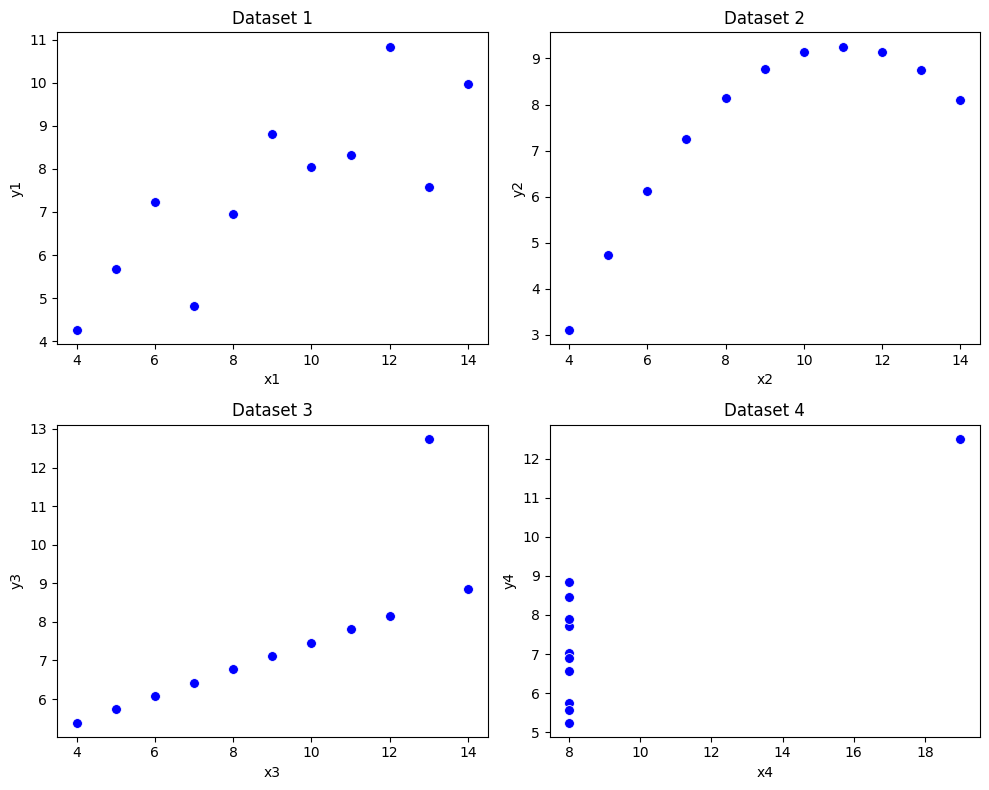


Parametry regresji liniowej:
Zestaw 1: y = 0.5001x + 3.0001, R = 0.8164, błąd = 0.1179
Zestaw 2: y = 0.5000x + 3.0009, R = 0.8162, błąd = 0.1180
Zestaw 3: y = 0.4997x + 3.0025, R = 0.8163, błąd = 0.1179
Zestaw 4: y = 0.4999x + 3.0017, R = 0.8165, błąd = 0.1178


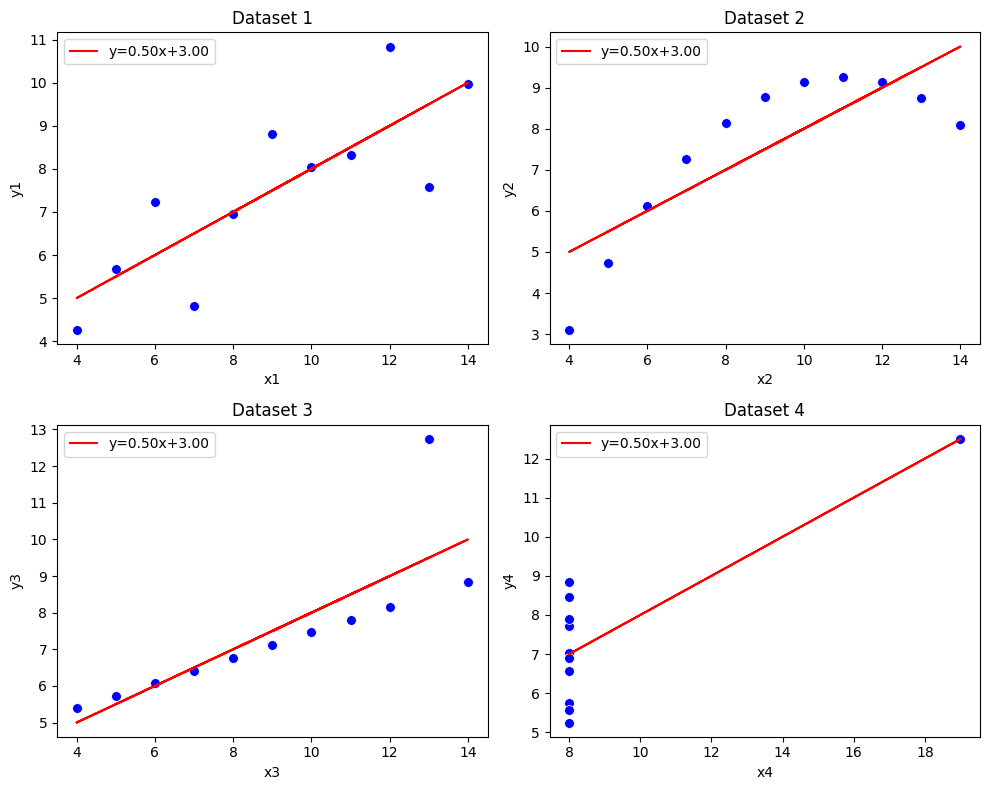


Współczynnik korelacji Pearsona:
Zestaw 1: r = 0.8164
Zestaw 2: r = 0.8162
Zestaw 3: r = 0.8163
Zestaw 4: r = 0.8165


In [28]:
df = pd.read_csv('anscombe.csv', skiprows=1)
df.columns = ['x1','y1','x2','y2','x3','y3','x4','y4']

print("Podgląd danych:")
print(df.head())

fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.flatten()

for i in range(1, 5):
    x = df[f'x{i}']
    y = df[f'y{i}']
    sns.scatterplot(x=x, y=y, ax=axes[i-1], color='blue', s=50)
    axes[i-1].set_title(f'Dataset {i}')
    axes[i-1].set_xlabel(f'x{i}')
    axes[i-1].set_ylabel(f'y{i}')

plt.tight_layout()
plt.show()

print("\nParametry regresji liniowej:")
results = {}

for i in range(1, 5):
    x = df[f'x{i}']
    y = df[f'y{i}']

    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    results[f'Set {i}'] = {
        'a (slope)': slope,
        'b (intercept)': intercept,
        'R': r_value,
        'std_err': std_err
    }
    print(f"Zestaw {i}: y = {slope:.4f}x + {intercept:.4f}, R = {r_value:.4f}, błąd = {std_err:.4f}")

fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.flatten()

for i in range(1, 5):
    x = df[f'x{i}']
    y = df[f'y{i}']
    slope = results[f'Set {i}']['a (slope)']
    intercept = results[f'Set {i}']['b (intercept)']

    sns.scatterplot(x=x, y=y, ax=axes[i-1], color='blue', s=50)
    axes[i-1].plot(x, slope*x + intercept, 'r', label=f'y={slope:.2f}x+{intercept:.2f}')
    axes[i-1].legend()
    axes[i-1].set_title(f'Dataset {i}')
    axes[i-1].set_xlabel(f'x{i}')
    axes[i-1].set_ylabel(f'y{i}')

plt.tight_layout()
plt.show()

print("\nWspółczynnik korelacji Pearsona:")
for i in range(1, 5):
    corr, _ = stats.pearsonr(df[f'x{i}'], df[f'y{i}'])
    print(f"Zestaw {i}: r = {corr:.4f}")
